# California lakes

### Import Python tools and Jupyter configuration

In [43]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [44]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_latimes as lat
import datetime as dt

In [ ]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = None

In [45]:
today = dt.datetime.today().strftime("%Y-%m-%d")

---

### Get lakes map data

In [ ]:
# https://data.ca.gov/dataset/california-lakes2

In [7]:
src_geo = gpd.read_file(
    "https://data-cdfw.opendata.arcgis.com/datasets/4d7024209b3d4b7796d4dd4119764d3e_5.geojson"
)

In [13]:
src_geo.sfc_acres.max()

In [30]:
src_geo.columns = src_geo.columns.str.lower()

### Just the big lakes

In [51]:
gdf = src_geo[
    (src_geo["sfc_acres"] > 1000) & (src_geo["name"].str.contains("Reservoir"))
]

In [52]:
gdf_slim = gdf[
    [
        "type",
        "name",
        "gnis_name",
        "gnis_id",
        "county",
        "lat_nad83",
        "lon_nad83",
        "elev_ft",
        "sfc_acres",
        "geometry",
    ]
]

<AxesSubplot:>

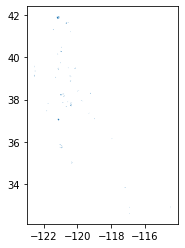

In [53]:
gdf_slim.plot()

In [54]:
gdf_slim.to_file("data/processed/reservoirs.geojson", driver="GeoJSON")